## Análisis Exploratorio de Datos (EDA)

En esta sección, nos sumergiremos en los conjuntos de datos limpios para realizar un análisis exploratorio detallado. El objetivo principal es entender la distribución de los datos, identificar patrones y extraer información valiosa que pueda ser crucial para el desarrollo de modelos de recomendación.También estaré haciendo uso de los archivos que fueron el input  inicial para justificar algunas acciones que apliqué en los notebooks ETL_user_reviews, ETL_user_items y ETL_steam_games.


⚠️ **Asegúrese de instalar las siguientes bibliotecas antes de ejecutar el código**

- pandas
- matplotlib

Puede instalar estas bibliotecas debe abrir una terminal o ventana de línea de comandos y ejecutar el siguiente comando:

*`pip install pandas matplotlib`*

### Bibliotecas Esenciales

In [28]:
# Importamos pandas para el análisis de datos tabulares
import pandas as pd
import matplotlib.pyplot as plt

#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud 

### Carga de Datos

In [2]:
df_user_reviews = pd.read_csv('user_reviews_cleaned.csv')
df_idiomas =  pd.read_csv('resumen_idiomas.csv')

#### Estadísticas Descriptivas

In [3]:
df_user_reviews.describe(include='all') 

,item_id,recommend,year,sentiment_analysis
count,44396.000000,44396,44396.000000,44396.000000
unique,NaN,2,NaN,NaN
top,NaN,True,NaN,NaN
freq,NaN,38887,NaN,NaN
mean,176676.353545,NaN,2014.250811,1.522119
std,131097.193190,NaN,0.827152,0.788692
min,10.000000,NaN,2010.000000,0.000000
25%,20920.000000,NaN,2014.000000,1.000000
50%,218620.000000,NaN,2014.000000,2.000000
75%,265630.000000,NaN,2015.000000,2.000000


#### Variable categórica `recommend` en User Reviews

Esta columna contiene categorías que representan si algo es recomendado o no. Se estará utilizando para juegos MÁS recomendados por usuarios y desarrolladoras con juegos MENOS recomendados 

In [4]:
# Calcula valores en la columna 'recommend' 
conteo_por_recomendaciones = df_user_reviews['recommend'].value_counts()
porcentaje_recomendaciones = df_user_reviews['recommend'].value_counts(normalize=True) * 100
#porcentaje_recomendaciones = porcentaje_recomendaciones.round(2).astype(str) + '%'

# Crear un nuevo DataFrame con el conteo y porcentaje
resumen_recomendaciones = pd.DataFrame({
    'Conteo': conteo_por_recomendaciones,
    'Porcentaje': porcentaje_recomendaciones.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_recomendaciones = resumen_recomendaciones.sort_values(by='Conteo', ascending=False)

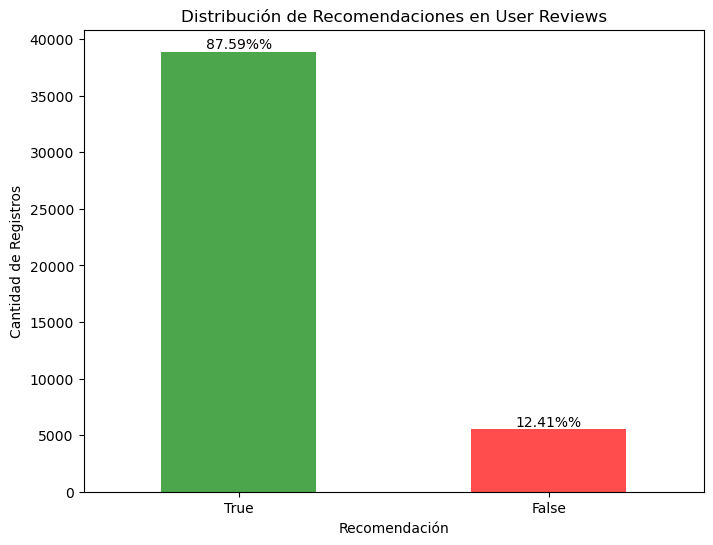

In [5]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(8, 6))
bars = resumen_recomendaciones['Conteo'].plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Recomendaciones en User Reviews')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')

# Agregar etiquetas con el porcentaje a cada barra
for bar, percentage in zip(bars.patches, resumen_recomendaciones['Porcentaje']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()


Se puede señalar que hay un desbalance considerable en las recomendaciones con el 87.59% marcadas como verdaderas y solo el 12.41% como falsas. Este desbalance puede afectar la capacidad del modelo para aprender patrones en las recomendaciones negativas debido a la falta de ejemplos.

- Impacto en el Modelo: 
 En situaciones de desbalance, algunos algoritmos pueden tener dificultades para aprender patrones en la clase minoritaria. 
- Relevancia de las Recomendaciones Positivas:
Existe una alta proporción de recomendaciones positivas, se podría considerar a mayor profundidad para conocer realmente si esto refleja la naturaleza de las reseñas de usuarios en la plataforma ó si hay sesgos en la recopilación de datos.

#### Variable categórica `year` en User Reviews

'year' representa el año en que los usuario realizaron la reseña.

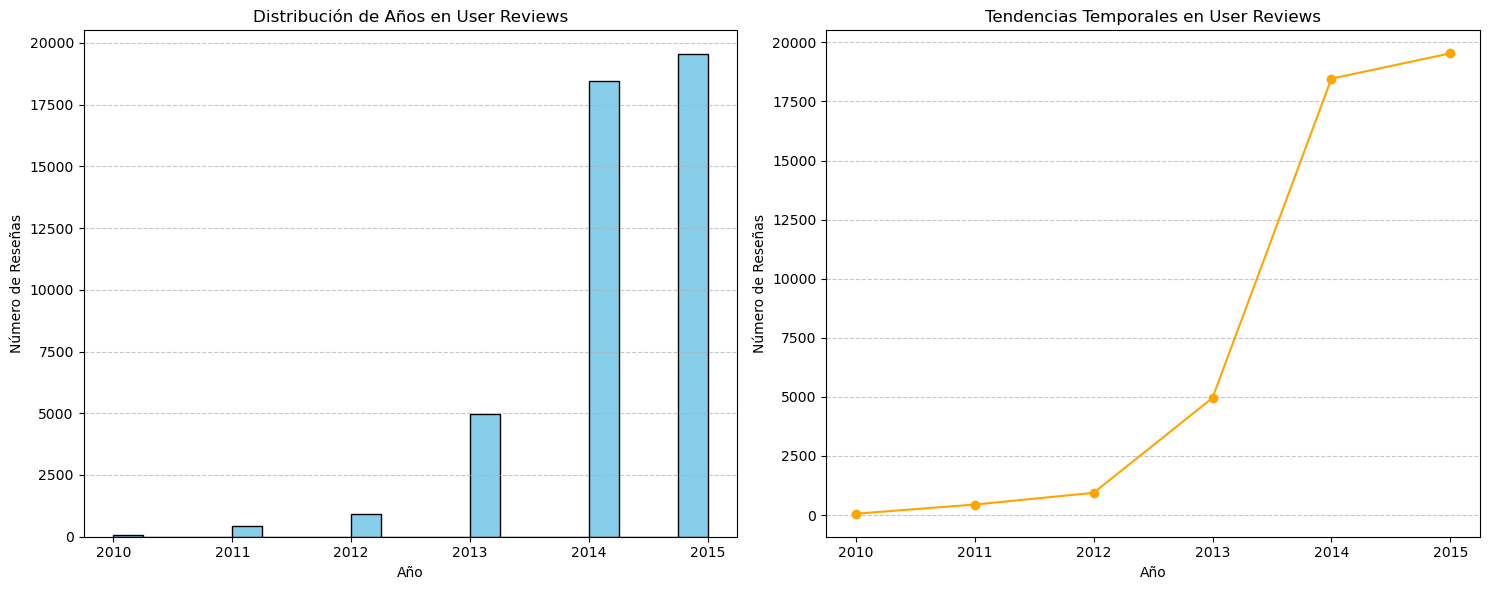

In [6]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de la distribución de años
axs[0].hist(df_user_reviews['year'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Años en User Reviews')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Reseñas')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas para mostrar tendencias temporales
trends = df_user_reviews['year'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='orange')
axs[1].set_title('Tendencias Temporales en User Reviews')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Reseñas')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Los gráficos de distribución de años y tendencias temporales presentan una perspectiva completa sobre la evolución temporal de las reseñas de usuarios en la plataforma Steam. Aquí algunos puntos clave para destacar:

- Histograma de Distribución de Años:
La mayoría de las reseñas se concentran en los años más recientes, particularmente en 2014, 2015, y en menor medida, 2013.
El año 2010 tiene la menor cantidad de reseñas, lo que sugiere un aumento significativo en la participación de usuarios con el tiempo y resalta la expansión y la creciente popularidad de la plataforma Steam en años más recientes.

- Gráfico de Líneas de Tendencias Temporales:
La tendencia temporal muestra un crecimiento constante en el número de reseñas a lo largo de los años.La línea alcanza su punto máximo en 2015, indicando un pico en la actividad de reseñas en ese año.

La relación entre la distribución de años y la tendencia temporal confirma que, aunque hay un aumento general en las reseñas a lo largo del tiempo, hay años específicos que contribuyen de manera significativa a este crecimiento.

In [ ]:
Este análisis respalda la importancia de considerar la variable temporal al desarrollar un modelo de recomendación, ya que las preferencias de los usuarios pueden evolucionar con el tiempo.
La concentración en años específicos puede indicar períodos de lanzamiento de juegos populares o cambios en la plataforma que influyen en la actividad de reseñas.
En conjunto, estos hallazgos proporcionan una base sólida para el desarrollo del modelo de recomendación, subrayando la necesidad de adaptarse a las tendencias cambiantes a lo largo del tiempo para brindar recomendaciones precisas y relevantes a los usuarios de Steam.

#### Variable categórica `sentiment_analysis` en User Reviews

Esta columna es un `Feature Engineering`. Es una nueva característica que fue creada con el objetivo de mejorar el rendimiento del futuro modelo de Machine Learning a partir de la columna 'reviews' que estaba presente en el conjunto de datos inicial e incluía reseñas de juegos hechos por distintos usuarios.

Antes de aplicar el análisis de sentimiento se evaluó la columna 'review' para obtener estadísticas sobre la cantidad de reseñas por lenguaje. Este análisis era crucial para determinar si el proceso de análisis de sentimientos se realizaría en todo el conjunto de datos ó si se aplicaría un filtro específico por idioma.



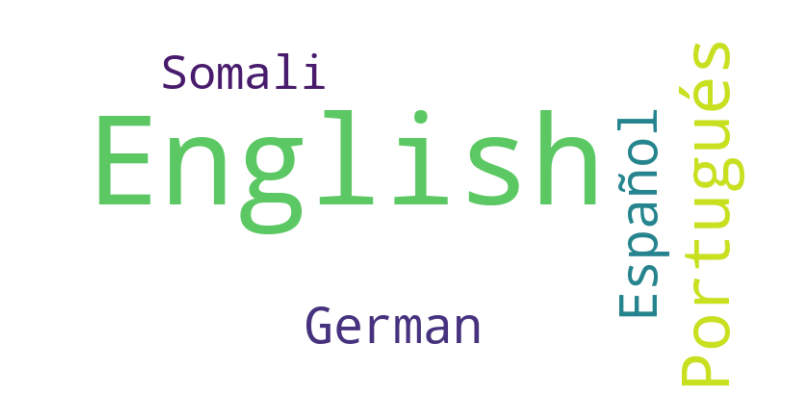

In [10]:
# Crear un diccionario con los datos del DataFrame
df_idiomas_dict = dict(zip(df_idiomas['Idioma'], df_idiomas['Conteo']))

# Colores personalizados
colores = ['blue', 'green', 'red', 'purple', 'orange']

# Crear la nube de palabras con colores personalizados
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(df_idiomas_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Con los resultados obtenidos consideré realizar el análisis de sentimiento solo en los registros en inglés, ya que constituyen una parte significativa del conjunto de datos (más del 70%). En el ETL se borraron los reviews que no estuvieran en inglés, aquí hay algunas razones que justifican esta decisión:

- Mayor Representatividad: 
Al centrarse en el inglés, que es la mayoría, se obtendrá un análisis de sentimiento más representativo de la mayoría de las reseñas en tu conjunto de datos. Esto puede ser especialmente útil ya que estamos interesados en comprender las opiniones predominantes en la audiencia principal.

- Precisión del Modelo: 
Los modelos de análisis de sentimiento a menudo están entrenados y optimizados para un idioma específico, y el inglés suele ser uno de los idiomas mejor cubiertos. Esto podría mejorar la precisión de los resultados.

- Eficiencia Computacional: 
Al reducir el conjunto de datos a solo los registros en inglés, puedes mejorar la eficiencia computacional, ya que el análisis se realizará en un conjunto de datos más pequeño.

**Análisis de sentimiento**

Se optó por utilizar la biblioteca NLTK (Natural Language Toolkit) con el analizador de sentimientos de Vader, que proporciona una puntuación compuesta que puede ser utilizada para clasificar la polaridad de las reseñas en negativas (valor '0'), neutrales (valor '1') o positivas (valor '2'). A las reseñas escritas ausentes, se les asignó el valor de '1'.

Justificación:

- Facilidad de Implementación: 
NLTK es una biblioteca de procesamiento de lenguaje natural popular en Python, y el analizador de sentimientos de Vader es fácil de implementar. Requiere menos configuración en comparación con algunos enfoques más avanzados y es adecuado para aplicaciones prácticas.

- Eficiencia Computacional: 
El analizador de sentimientos de Vader es eficiente computacionalmente, lo que significa que puede manejar grandes conjuntos de datos sin un costo computacional excesivo. Esto es crucial para aplicaciones en entornos empresariales donde la eficiencia de procesamiento es esencial.

- Polaridad Compuesta: 
La puntuación compuesta proporcionada por el analizador de sentimientos de Vader ofrece una representación única y fácil de interpretar de la polaridad de la reseña. Esta puntuación compuesta se utiliza para asignar valores numéricos a las categorías de sentimientos según la escala propuesta.

- Niveles Aceptables de Precisión: 
Aunque el analizador de sentimientos de Vader no es perfecto y puede tener limitaciones en ciertos contextos, es conocido por su rendimiento aceptable en una variedad de situaciones prácticas. La precisión puede variar según el tipo de texto y el dominio, pero en general, proporciona resultados razonables para tareas de análisis de sentimientos.

Es importante destacar que la precisión de cualquier método de análisis de sentimientos puede depender en gran medida del contexto específico del conjunto de datos y del lenguaje utilizado en las reseñas. Si la precisión es una preocupación principal y el conjunto de datos lo permite se podría considerar para una segunda fase enfoques más avanzados, como modelos de aprendizaje profundo entrenados para análisis de sentimientos.

En resumen, el enfoque seleccionado con el analizador de sentimientos de Vader en NLTK se elige por su equilibrio entre facilidad de implementación, eficiencia computacional y niveles aceptables de precisión para el propósito del análisis de sentimientos en este contexto específico.

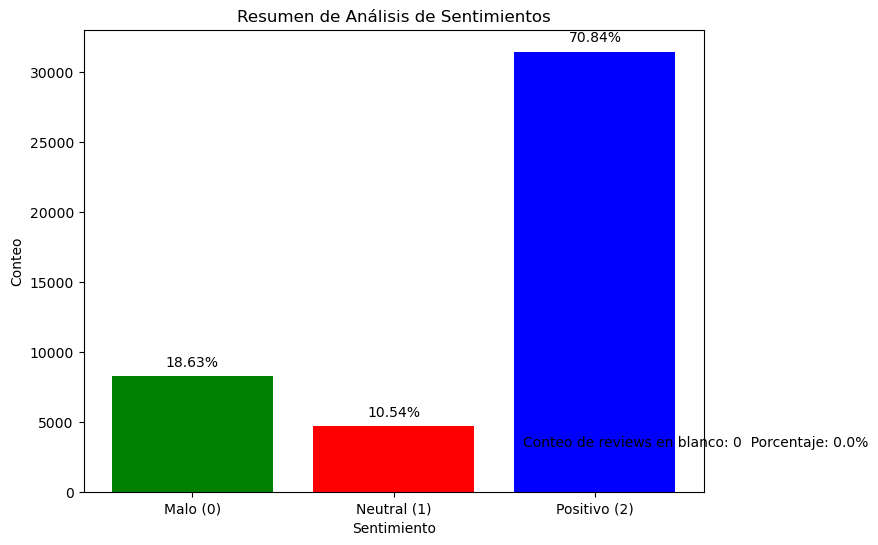

In [34]:
# Calcular el resumen de análisis de sentimientos

sentiment_summary = df_user_reviews['sentiment_analysis'].value_counts()
percentage_summary = (df_user_reviews['sentiment_analysis'].value_counts(normalize=True) * 100).round(2)

# Crear un nuevo DataFrame con el resumen
resumen_sentimientos = pd.DataFrame({
    'Conteo': sentiment_summary,
    'Porcentaje': percentage_summary.astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_sentimientos = resumen_sentimientos.sort_index()

# Visualizar el resumen
fig, ax = plt.subplots(figsize=(8, 6))

# Crear barras para el conteo
ax.bar(resumen_sentimientos.index, resumen_sentimientos['Conteo'], color=['green', 'red', 'blue'])

# Mostrar porcentajes encima de las barras
for i, v in enumerate(resumen_sentimientos['Porcentaje']):
    ax.text(i, resumen_sentimientos['Conteo'][i] + 500, f"{v}", ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Resumen de Análisis de Sentimientos')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Conteo')
ax.set_xticks(resumen_sentimientos.index)
ax.set_xticklabels(['Malo (0)', 'Neutral (1)', 'Positivo (2)'])

# Mostrar el conteo de reviews en blanco
conteo_reviews_en_blanco = (df_user_reviews['sentiment_analysis'].isnull()).sum()
porcentaje_reviews_en_blanco = (conteo_reviews_en_blanco / len(df_user_reviews) * 100).round(2)
ax.text(2.5, 3000, f"Conteo de reviews en blanco: {conteo_reviews_en_blanco}  Porcentaje: {porcentaje_reviews_en_blanco}%", ha='center', va='bottom')

plt.show()


En el análisis de sentimientos de las reseñas en la columna 'sentiment_analysis', observamos lo siguiente:

- Positivo (2):
Representa la categoría dominante en las reseñas, abarcando el 70.83% del total. Esto indica que la gran mayoría de las reseñas tiene un sentimiento positivo.

- Neutral (1):
Aunque en menor proporción, un 10.53% de las reseñas se clasifican como neutrales. Esto podría indicar que algunos usuarios expresan opiniones sin un sesgo claramente positivo o negativo.

- Negativo (0):
La categoría de sentimiento negativo tiene una presencia más baja, constituyendo el 18.63%. Esto sugiere que, en general, la plataforma tiene una inclinación positiva en las reseñas de los usuarios.

Consideraciones:
La mayoría de los usuarios tiende a expresar opiniones positivas en sus reseñas.La proporción de reseñas neutrales es relativamente baja, lo que indica que la mayoría de los usuarios tiende a tener opiniones claramente positivas o negativas.